# Using _egobox_ surrogate model _Gpx_

We import _egobox_ as _egx_ for short

In [1]:
import egobox as egx

# Example 1

### Training 

#### Training data definition

In [2]:
import numpy as np

xt = np.array([[0.0, 1.0, 2.0, 3.0, 4.0]]).T
yt = np.array([[0.0, 1.0, 1.5, 0.9, 1.0]]).T

#### Building the surrogate

In [3]:
gpmix = egx.Gpx.builder()
gpmix.set_training_values(xt, yt)
gpx = gpmix.train()

### Prediction

#### Using the surrogate for estimation

In [4]:
# number of x locations to estimate
num = 100

# x should have 2D shape (nsamples, nx)
x = np.linspace(0.0, 4.0, num).reshape((-1, 1))

# estimated values
y = gpx.predict_values(x)
# estimated variances
s2 = gpx.predict_variances(x)

#### Plotting results

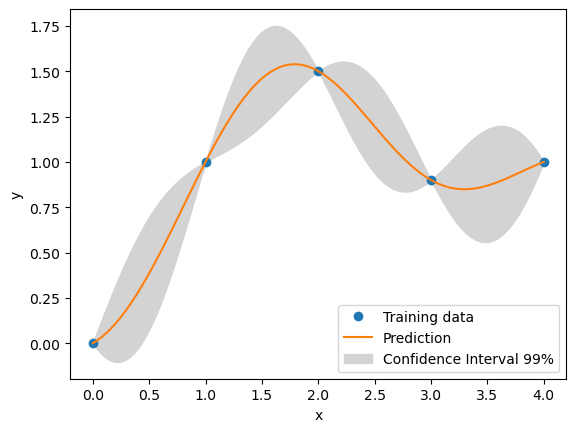

In [5]:
import matplotlib.pyplot as plt

def plot_gp(xt, yt, x, y, s2):
    fig, axs = plt.subplots(1)
    
    # training data
    axs.plot(xt, yt, "o")
    
    # gp mean
    axs.plot(x, y)
    
    # 99% confidence interval
    axs.fill_between(
        np.ravel(x),
        np.ravel(y - 3 * np.sqrt(s2)),
        np.ravel(y + 3 * np.sqrt(s2)),
        color="lightgrey",
    )
    
    # legend
    axs.set_xlabel("x")
    axs.set_ylabel("y")
    axs.legend(
        ["Training data", "Prediction", "Confidence Interval 99%"],
        loc="lower right",
    )
    return axs

plot_gp(xt, yt, x, y, s2)
plt.show()

### Sampling

#### Sampling the conditionned Gaussian process

In [6]:
# number fo trajectories to sample
n_traj = 30

trajs = gpx.sample(x, n_traj)

#### Plotting trajectories

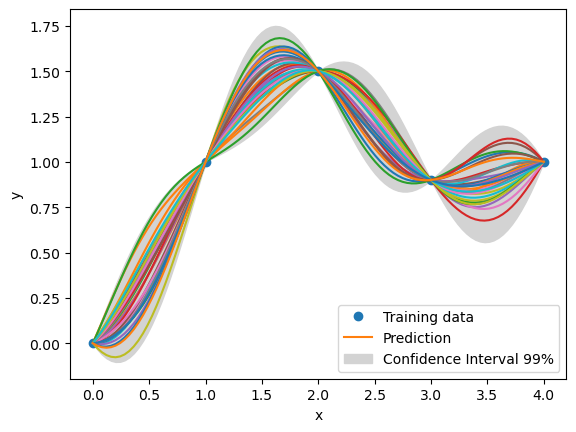

In [7]:
axs = plot_gp(xt, yt, x, y, s2)

for i in range(n_traj):
    axs.plot(x, trajs[:, i])

plt.show()

## Example 2

### Test function

$$f : \left\{ \begin{array}{c} [-10, 10] \rightarrow \mathbb{R} \\ x \mapsto x^2 \sin(x) \ \end{array} \right.$$

In [8]:
import numpy as np

def f(x):
    return x**2 * np.sin(x)

### Training

$f$ is approximated with _Gpx_ at points $-8.5$,  $-4.0$,  $-3.0$,  $-1.0$, $4.0$ and  $7.5$. 

In [9]:
xt = np.array([[-8.5, -4.0, -3.0, -1.0, 4.0, 7.5]]).T
yt = f(xt)

In [10]:
gpx_builder = egx.Gpx.builder()
gpx_builder.set_training_values(xt, yt)
gpx =  gpx_builder.train()

### Prediction

In [11]:
x_min, x_max = -10, 10
n_plot = 500

# x must have (nsamples, nx) shape
x = np.linspace(x_min, x_max, n_plot).reshape(-1, 1)

y = gpx.predict_values(x)
s2 = gpx.predict_variances(x)

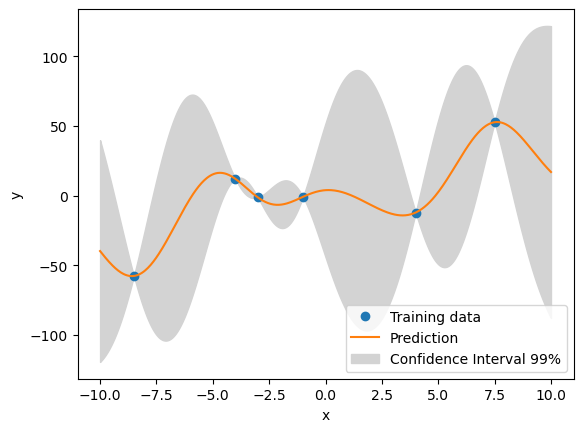

In [12]:
plot_gp(xt, yt, x, y, s2)
plt.show()

### Sampling

#### Sampling the conditionned Gaussian process

In [13]:
# number fo trajectories to sample
n_traj = 10

trajs = gpx.sample(x, n_traj)

#### Plotting trajectories

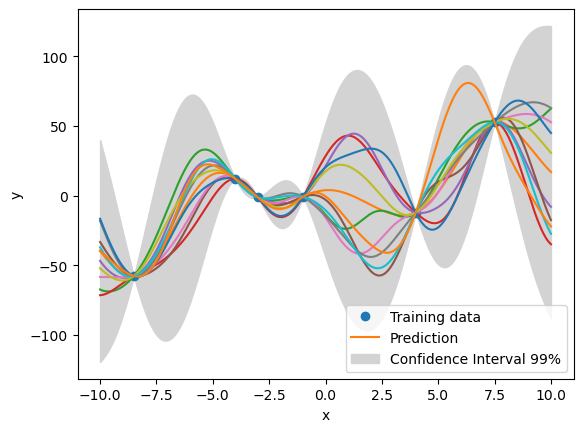

In [14]:
axs = plot_gp(xt, yt, x, y, s2)

for i in range(n_traj):
    axs.plot(x, trajs[:, i])

plt.show()